In [644]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from nonparametric_linear_regression import construct_cluster_list
from nonparametric_non_conj_AR import sample_y_predictive
from scipy.linalg import toeplitz

In [645]:
data = pd.read_csv("data/UK_covid_data.csv")

In [646]:
data.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,368032,GBR,Europe,United Kingdom,2020-08-09,312127.0,6418.0,916.857,57422.0,145.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,56163.992,14.63,-1.82,837.52515
1,368039,GBR,Europe,United Kingdom,2020-08-16,319924.0,7797.0,1113.857,57573.0,151.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,56353.094,14.29,1.82,840.34503
2,368046,GBR,Europe,United Kingdom,2020-08-23,327652.0,7728.0,1104.000,57686.0,113.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,56846.195,14.04,4.70,847.69824
3,368053,GBR,Europe,United Kingdom,2020-08-30,336506.0,8854.0,1264.857,57786.0,100.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,57675.695,13.92,8.70,860.06790
4,368060,GBR,Europe,United Kingdom,2020-09-06,352029.0,15523.0,2217.571,57873.0,87.0,...,24.7,NaN,2.54,81.32,0.932,67508936.0,56204.395,13.23,-14.02,838.12760


In [647]:
y = data["new_cases"].to_numpy()/10**5

In [648]:
n = len(y)

In [649]:
x = [i for i in range(n)]

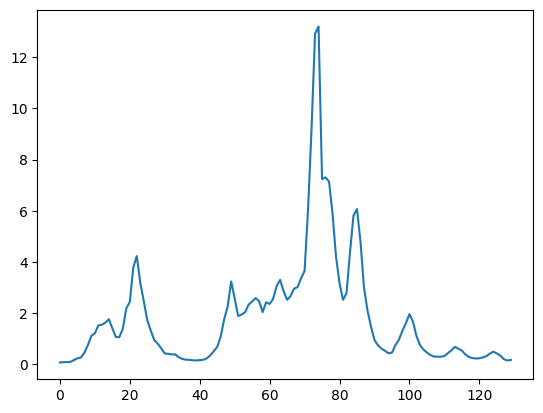

In [650]:
plt.plot(x, y)

In [651]:
diff_y = np.diff(y)

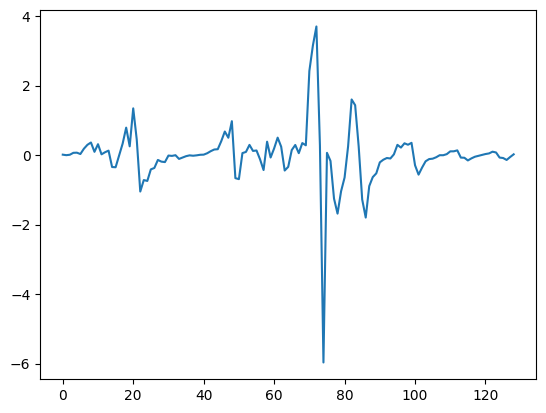

In [652]:
plt.plot(range(n - 1), diff_y)

In [653]:
y_new = diff_y[-1]

In [654]:
length = "long"
prior = "gamma"
folder = "AR_covid_non_conj_AR_mat"

In [655]:
with open(f"{folder}/{length}_mem_{prior}_clusters.pkl", "rb") as f:
    clusters_load = pickle.load(f)

In [656]:
with open(f"{folder}/{length}_mem_{prior}_cluster_values.pkl", "rb") as f:
    cluster_values_load = pickle.load(f)

In [657]:
params = np.load(f"{folder}/{length}_mem_{prior}_single_params.npz")

In [658]:
with open(f"{folder}/{length}_mem_{prior}_tau_values.pkl", 'rb') as f:
    tau_list_load = pickle.load(f)

In [659]:
clusters = clusters_load[2000:]
cluster_values = cluster_values_load[2000:]
tau_list = tau_list_load[2000:]

In [660]:
n = max(clusters[0]) + 1

In [661]:
cluster_lists = [construct_cluster_list(x, n) for x in clusters]

In [662]:
y = params["y"]

In [663]:
stds =[np.std(y[t]) for t in cluster_lists[-1]]

In [664]:
np.argmax(stds)

2

In [666]:
index = -1

-1

In [667]:
min([len(x) for x in cluster_lists])

3

In [668]:
# Last iterations
max_var_cluster = cluster_lists[index][np.argmax([np.var(y[t])*len(t)**2/n for t in cluster_lists[index]])]
#max_var_cluster = cluster_lists[index][np.argmax([np.var(y[t]) for t in cluster_lists[index]])]

In [669]:
cluster_lists[index]

[[0,
  1,
  2,
  3,
  4,
  9,
  24,
  25,
  34,
  38,
  47,
  53,
  57,
  61,
  63,
  65,
  71,
  73,
  74,
  75,
  96,
  98,
  101,
  102,
  105,
  107,
  111,
  112,
  113,
  117,
  121,
  123],
 [5,
  6,
  7,
  8,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  19,
  21,
  22,
  23,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  35,
  36,
  37,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  48,
  49,
  50,
  51,
  52,
  54,
  55,
  56,
  58,
  59,
  60,
  62,
  64,
  66,
  67,
  76,
  77,
  78,
  81,
  82,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  99,
  100,
  103,
  104,
  106,
  108,
  109,
  110,
  114,
  115,
  116,
  118,
  119,
  120,
  122,
  124,
  125],
 [18, 20, 26, 46, 68, 69, 70, 72, 79, 80, 83, 84, 85, 97]]

In [670]:
max_var_cluster

[5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 21,
 22,
 23,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 58,
 59,
 60,
 62,
 64,
 66,
 67,
 76,
 77,
 78,
 81,
 82,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 99,
 100,
 103,
 104,
 106,
 108,
 109,
 110,
 114,
 115,
 116,
 118,
 119,
 120,
 122,
 124,
 125]

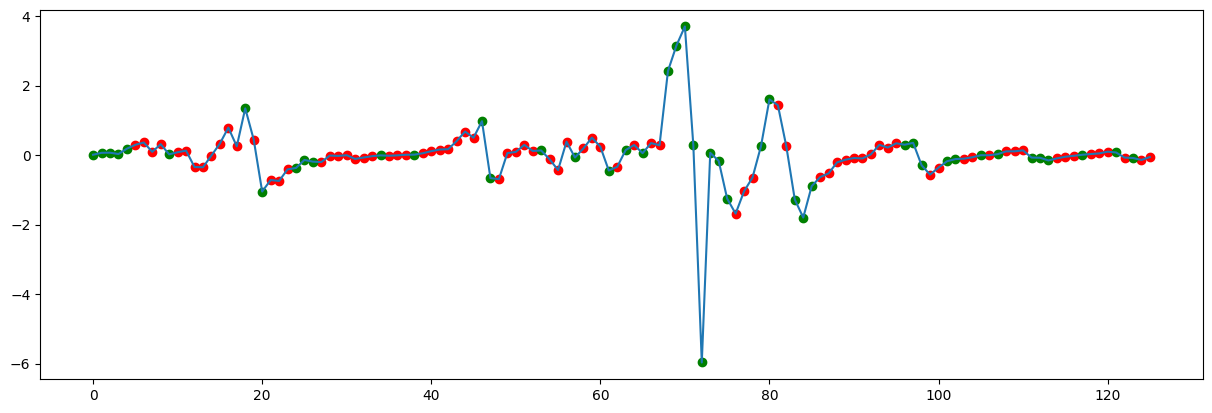

In [671]:
x_other = [x for x in range(n) if x not in max_var_cluster]
x = range(n)
plt.figure().set_figwidth(15)
plt.plot(x,y)
plt.scatter(max_var_cluster, y[max_var_cluster], color = "red")
plt.scatter(x_other, y[x_other], color = "green")

In [672]:
X = params["X"]
w = params["w"][-1]
n, p = X.shape

In [673]:
if "rho" in params:
    rho = params["rho"][-1]
    row = [rho**i for i in range(p)]
    cov_matrix = toeplitz(row, row)
else:
    cov_matrix = 0.5*np.identity(p)

In [674]:
sample_y_predictive(cluster_lists[index], w, "gamma", cluster_values[-1], X[-1], n, cov_matrix, tau_list[-1], 2, np.var(y))

-0.024241533366281043

In [675]:
predictive_bias = 0
for i in range(1000):
    w = params["w"][-i]

    if "rho" in params:
        rho = params["rho"][-i]
        row = [rho**i for i in range(p)]
        cov_matrix = toeplitz(row, row)
    else:
        cov_matrix = 0.5*np.identity(p)

    x = np.array([1, y[-1], y[-2]])
    y_pred = sample_y_predictive(cluster_lists[-i], w, prior, cluster_values[-i], x, n, cov_matrix, tau_list[-i], 2, np.var(y))
    predictive_bias += abs(y_pred - y_new)

print(predictive_bias/1000)

0.19056635341243774


In [676]:
tau_max_var = np.zeros(len(tau_list))
cluster_values_max_var = np.zeros((len(cluster_values), p))

In [677]:
for i in range(len(tau_list)):
    max_var_index = np.argmax([np.var(y[t]) for t in cluster_lists[i]])
    tau_max_var[i] = tau_list[i][max_var_index]
    cluster_values_max_var[i] = cluster_values[i][max_var_index]

In [678]:
num_clusters = [len(x) for x in cluster_lists]

In [679]:
print(f"num clusters: {np.mean(num_clusters)} +- {np.std(num_clusters)}")
ls = {"rho": params["rho"][2000:], "tau_max_var" : tau_max_var, "cluster_values_max_var" : cluster_values_max_var}
for name, vec in ls.items():
    center = (np.quantile(vec, 0.025, axis = 0) + np.quantile(vec, 0.975, axis = 0))*0.5
    dist = center - np.quantile(vec, 0.025)
    print(f"{name}: {center} +- {dist}")

num clusters: 3.3781632653061227 +- 0.5908249972928299
rho: 0.24275614171003254 +- 0.23648835062450554
tau_max_var: 0.7179787395329801 +- 0.4897640111816618
cluster_values_max_var: [ 0.52077141  0.55209066 -1.49446787] +- [2.31626499 2.34758424 0.30102572]
